# Credit risk modelling using German Credit Dataset

## Description for the Dataset
Columns-
1. Age (numeric)
2. Sex (text: male, female)
3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
4. Housing (text: own, rent, or free)
5. Saving accounts (text - little, moderate, quite rich, rich)
6. Checking account (numeric, in DM - Deutsch Mark)
7. Credit amount (numeric, in DM)
9. Duration (numeric, in month)
10. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)
11. Risk


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset
df = pd.read_csv('../dataset/german_credit_data.csv')

## Exploring the dataset

In [4]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


we have a unnamed column that was saved as index. Lets delete that

In [5]:
df = df.drop('Unnamed: 0',axis=1)

In [6]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [7]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [9]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

lets check each column

In [10]:
df.Age.min(),df.Age.max()

(19, 75)

In [11]:
df.Sex.value_counts()

Sex
male      690
female    310
Name: count, dtype: int64

In [12]:
df.Job.value_counts().sort_index()

Job
0     22
1    200
2    630
3    148
Name: count, dtype: int64

0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled

we can see that most are skilled people which is good indicator

In [13]:
df.Housing.value_counts()

Housing
own     713
rent    179
free    108
Name: count, dtype: int64

In [14]:
df['Saving accounts'].value_counts()

Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

In [15]:
df['Checking account'].value_counts()

Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64

In [16]:
df['Checking account'].isnull().sum()

394

there are too many nulls in the checking account and we cannot afford to lose data.
Imputing would make the data worse.
Will be dropping 'Checking account' later on

In [17]:
df['Credit amount'].min(),df['Credit amount'].max()

(250, 18424)

credit amount is quite a large range.

In [18]:
df['Duration'].min(),df['Duration'].max()

(4, 72)

In [19]:
df['Purpose'].value_counts()

Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64

In [20]:
df['Purpose'].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [21]:
df['Risk'].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

## One hot encoding the columns.
col_names_for_encoding = [Sex,Housing,Savings account, checking account, Purpose]

In [22]:
df['gender_encoded'] = df['Sex'].map({'male':0,'female':1})

In [23]:
#Housing is encoded as -> own:0, rent:1, free:3
df['housing_enc'] = df['Housing'].map({'own':0,'rent':1,'free':3})

In [24]:
# Savings are encoded as -> little:0 ,moderate:1,quite rich:2,rich:3
df['sav_acc_enc'] = df['Saving accounts'].map({'little':0 ,'moderate':1,'quite rich':3,'rich':2})

In [25]:
df['che_acc_enc'] = df['Checking account'].map({'little':0 ,'moderate':1,'rich':2})

Encodings for Purpose ->

'radio/TV':0, 'education':1, 'furniture/equipment':2, 'car':3, 'business':4,'domestic appliances':5, 'repairs':6, 'vacation/others':7

In [26]:
# the 'Housing' has a extra space at last and that will cause problem 
df['Purpose'] = df['Purpose'].str.strip()

In [27]:
df['purpose_enc'] = df['Purpose'].map({'radio/TV':0, 'education':1, 'furniture/equipment':2, 'car':3, 'business':4,'domestic appliances':5, 'repairs':6, 'vacation/others':7})

In [28]:
df['risk_enc'] = df['Risk'].map({'good':0,'bad':1})

In [29]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,gender_encoded,housing_enc,sav_acc_enc,che_acc_enc,purpose_enc,risk_enc
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,0,0,NaN,0.0,0,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,1,0,0.0,1.0,0,1
2,49,male,1,own,little,NaN,2096,12,education,good,0,0,0.0,NaN,1,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,0,3,0.0,0.0,2,0
4,53,male,2,free,little,little,4870,24,car,bad,0,3,0.0,0.0,3,1


lets drop the columns that are not needed now

In [30]:
col_to_drop = ['Sex','Housing','Saving accounts','Checking account','Purpose','Risk']

for col in col_to_drop:
    df=df.drop(col,axis=1)

In [31]:
df.head()

,Age,Job,Credit amount,Duration,gender_encoded,housing_enc,sav_acc_enc,che_acc_enc,purpose_enc,risk_enc
0,67,2,1169,6,0,0,NaN,0.0,0,0
1,22,2,5951,48,1,0,0.0,1.0,0,1
2,49,1,2096,12,0,0,0.0,NaN,1,0
3,45,2,7882,42,0,3,0.0,0.0,2,0
4,53,2,4870,24,0,3,0.0,0.0,3,1


## Data Cleaning

As we had checked before checking account has lots of NaN value.
Before dropping any columns or rows lets look at the correlation between cols.

In [32]:
corr_matrix = df.corr()
corr_matrix

,Age,Job,Credit amount,Duration,gender_encoded,housing_enc,sav_acc_enc,che_acc_enc,purpose_enc,risk_enc
Age,1.000000,0.015673,0.032716,-0.036136,-0.161694,0.162643,0.037279,0.008451,0.071069,-0.091127
Job,0.015673,1.000000,0.285385,0.210910,-0.070298,0.116769,-0.037338,-0.022126,0.024629,0.032735
Credit amount,0.032716,0.285385,1.000000,0.624984,-0.093482,0.188179,-0.065134,-0.019838,0.214513,0.154739
Duration,-0.036136,0.210910,0.624984,1.000000,-0.081432,0.159768,-0.029050,-0.042768,0.105524,0.214927
gender_encoded,-0.161694,-0.070298,-0.093482,-0.081432,1.000000,-0.008967,-0.017152,-0.002425,-0.051436,0.075493
housing_enc,0.162643,0.116769,0.188179,0.159768,-0.008967,1.000000,-0.028549,-0.071393,0.084657,0.117673
sav_acc_enc,0.037279,-0.037338,-0.065134,-0.029050,-0.017152,-0.028549,1.000000,0.155945,-0.003972,-0.138183
che_acc_enc,0.008451,-0.022126,-0.019838,-0.042768,-0.002425,-0.071393,0.155945,1.000000,-0.070404,-0.165131
purpose_enc,0.071069,0.024629,0.214513,0.105524,-0.051436,0.084657,-0.003972,-0.070404,1.000000,0.090001
risk_enc,-0.091127,0.032735,0.154739,0.214927,0.075493,0.117673,-0.138183,-0.165131,0.090001,1.000000


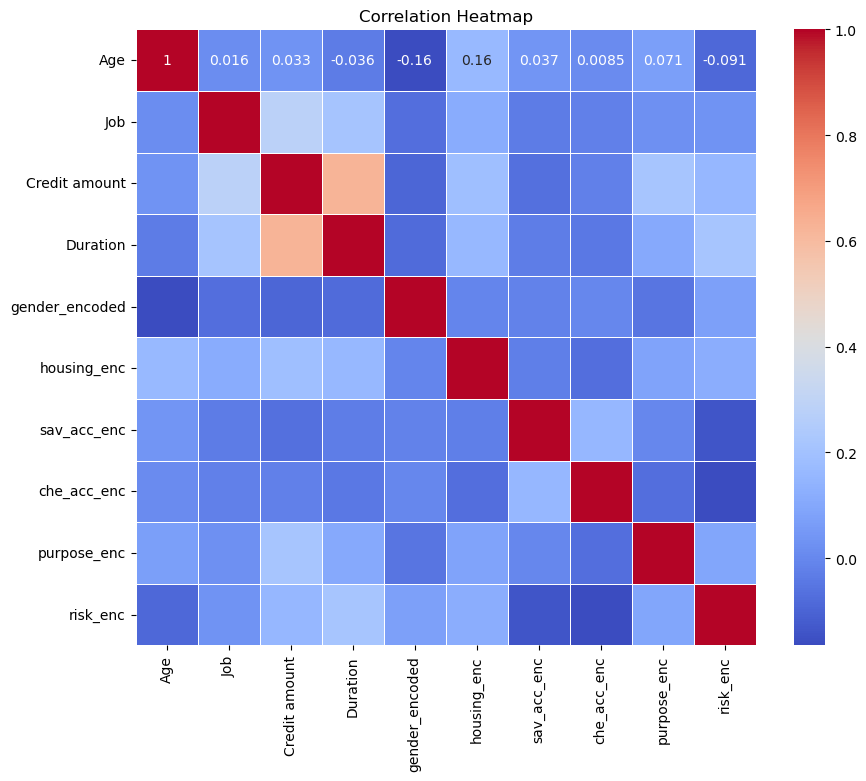

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

inference: checking account does not have much relation with the risk, we can drop it 

In [33]:
df = df.drop('che_acc_enc',axis=1)

In [34]:
df.head(2)

,Age,Job,Credit amount,Duration,gender_encoded,housing_enc,sav_acc_enc,purpose_enc,risk_enc
0,67,2,1169,6,0,0,NaN,0,0
1,22,2,5951,48,1,0,0.0,0,1


In [35]:
# changing column names for easier coding 
df = df.rename(columns={'Age':'age','Job':'job','Credit amount':'credit_amt','Duration':'duration','gender_encoded':'sex','housing_enc':'housing','sav_acc_enc':'sav_acc','purpose_enc':'purpose','risk_enc':'risk'})

In [36]:
df.head(2)

,age,job,credit_amt,duration,sex,housing,sav_acc,purpose,risk
0,67,2,1169,6,0,0,NaN,0,0
1,22,2,5951,48,1,0,0.0,0,1


In [37]:
df.isnull().sum()

age             0
job             0
credit_amt      0
duration        0
sex             0
housing         0
sav_acc       183
purpose         0
risk            0
dtype: int64

In [38]:
df.duplicated().sum()

0

In [39]:
#dropping null
df.dropna(axis=0,inplace=True)

In [40]:
df.isnull().sum()

age           0
job           0
credit_amt    0
duration      0
sex           0
housing       0
sav_acc       0
purpose       0
risk          0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 1 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         817 non-null    int64  
 1   job         817 non-null    int64  
 2   credit_amt  817 non-null    int64  
 3   duration    817 non-null    int64  
 4   sex         817 non-null    int64  
 5   housing     817 non-null    int64  
 6   sav_acc     817 non-null    float64
 7   purpose     817 non-null    int64  
 8   risk        817 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 63.8 KB


In [42]:
df.head(2)

,age,job,credit_amt,duration,sex,housing,sav_acc,purpose,risk
1,22,2,5951,48,1,0,0.0,0,1
2,49,1,2096,12,0,0,0.0,1,0


lets save the data for modelling

In [43]:
df.to_csv('preprocessed_data.csv',header=True,index=False)